In [1]:
!pip install pandas numpy seaborn matplotlib

You should consider upgrading via the 'C:\PYTHON 3.10\python.exe -m pip install --upgrade pip' command.


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [126]:
ipl = pd.read_csv(r'C:\Users\HP\Downloads\archive (3)\ipl_2023_dataset.csv')

In [127]:
ipl.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [128]:
ipl.shape

(568, 7)

In [129]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player Name       568 non-null    object 
 1   Base Price        568 non-null    object 
 2   Type              568 non-null    object 
 3   Cost in Rs. (CR)  243 non-null    float64
 4   Cost in $ (K)     243 non-null    float64
 5   2022 Squad        230 non-null    object 
 6   2023 Squad        568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


In [130]:
ipl.columns

Index(['Player Name', 'Base Price', 'Type', 'Cost in Rs. (CR)',
       'Cost in $ (K)', '2022 Squad', '2023 Squad'],
      dtype='object')

In [131]:
ipl.isnull().sum()

Player Name           0
Base Price            0
Type                  0
Cost in Rs. (CR)    325
Cost in $ (K)       325
2022 Squad          338
2023 Squad            0
dtype: int64

In [132]:
ipl[ipl['Cost in $ (K)'].isnull()]

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
243,Tom Banton,20000000,WICKETKEEPER,NaN,NaN,NaN,Unsold
244,Kusal Mendis,5000000,WICKETKEEPER,NaN,NaN,NaN,Unsold
245,Chris Jordan,20000000,BOWLER,NaN,NaN,CSK,Unsold
246,Adam Milne,20000000,BOWLER,NaN,NaN,CSK,Unsold
247,Mujeeb Rahman,10000000,BOWLER,NaN,NaN,NaN,Unsold
...,...,...,...,...,...,...,...
563,Dhruv Patel,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
564,Jack Prestwidge,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
565,Aditya Sarvate,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
566,Sagar Solanki,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [133]:
ipl['Cost in Rs. (CR)'] = ipl['Cost in Rs. (CR)'].fillna(0)
ipl['Cost in $ (K)'] = ipl['Cost in $ (K)'].fillna(0)

In [134]:
ipl[ipl['2022 Squad'].isnull()]

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
1,Joshua Little,5000000,BOWLER,4.40,528.0,NaN,GT
4,Mohit Sharma,5000000,BOWLER,0.50,60.0,NaN,GT
6,Urvil Patel,2000000,WICKETKEEPER,0.20,24.0,NaN,GT
25,Ben Stokes,20000000,ALL-ROUNDER,16.25,1950.0,NaN,CSK
26,Kyle Jamieson,10000000,BOWLER,1.00,120.0,NaN,CSK
...,...,...,...,...,...,...,...
563,Dhruv Patel,2000000,ALL-ROUNDER,0.00,0.0,NaN,Unsold
564,Jack Prestwidge,2000000,ALL-ROUNDER,0.00,0.0,NaN,Unsold
565,Aditya Sarvate,2000000,ALL-ROUNDER,0.00,0.0,NaN,Unsold
566,Sagar Solanki,2000000,ALL-ROUNDER,0.00,0.0,NaN,Unsold


In [135]:
ipl['2022 Squad'] = ipl['2022 Squad'].fillna('Not Participated')

In [136]:
ipl.isnull().sum()

Player Name         0
Base Price          0
Type                0
Cost in Rs. (CR)    0
Cost in $ (K)       0
2022 Squad          0
2023 Squad          0
dtype: int64

In [137]:
teams = ipl[ipl['Cost in Rs. (CR)']>0]['2023 Squad'].unique()
teams

array(['GT', 'CSK', 'DC', 'KKR', 'PBKS', 'LSG', 'MI', 'RCB', 'RR', 'SRH'],
      dtype=object)

In [138]:
ipl['status'] = ipl['2023 Squad'].replace(teams,"Sold")

In [139]:
ipl

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT,Sold
1,Joshua Little,5000000,BOWLER,4.4,528.0,Not Participated,GT,Sold
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT,Sold
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT,Sold
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,Not Participated,GT,Sold
...,...,...,...,...,...,...,...,...
563,Dhruv Patel,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold
564,Jack Prestwidge,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold
565,Aditya Sarvate,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold
566,Sagar Solanki,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold


In [140]:
ipl[ipl['Player Name'].duplicated(keep = False)]

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status
316,Akash Singh,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
326,Shivam Sharma,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
362,Akash Singh,2000000,BATSMAN,0.0,0.0,Not Participated,Unsold,Unsold
393,Prince Yadav,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
534,Prince Yadav,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold
542,Shivam Sharma,2000000,ALL-ROUNDER,0.0,0.0,Not Participated,Unsold,Unsold


In [141]:
# How many players have participated in 2023 Ipl Auction?
# shape func to define the rows value
ipl.shape[0]


568

In [142]:
#How many players have participated?
type = ipl['Type'].value_counts()
type.reset_index()

,index,Type
0,ALL-ROUNDER,213
1,BOWLER,189
2,BATSMAN,91
3,WICKETKEEPER,75


[]

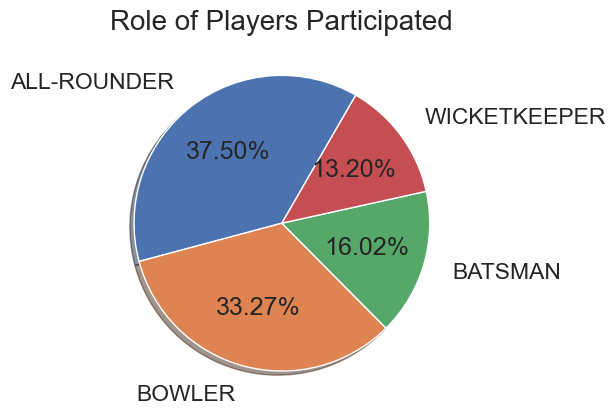

In [143]:
#to plot the pie graph
plt.pie(type.values, labels=type.index,labeldistance=1.2,autopct='%1.2f%%' , shadow=True, startangle=60)
plt.title('Role of Players Participated', fontsize = 20)
plt.plot()




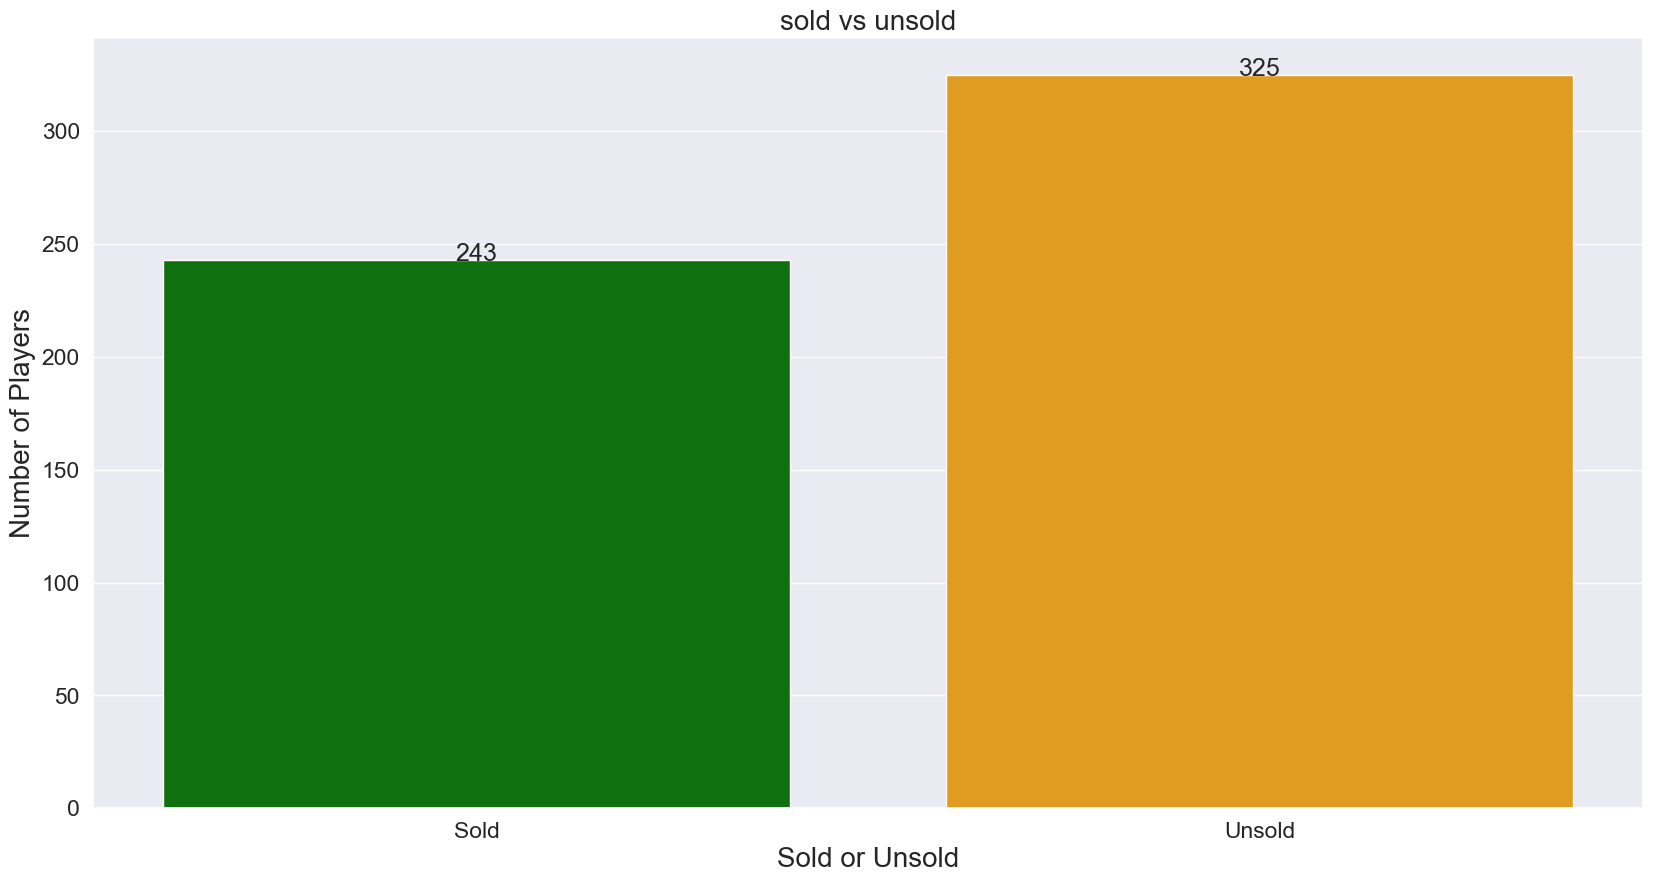

In [144]:
sns.set(font_scale = 1.5)

# Player sold and unsold using a BAR GRAPH.

plt.figure(figsize=(20,10))
df = ipl
fig = sns.countplot(x = "status", data = df, palette = ["Green", "Orange"])
plt.xlabel('Sold or Unsold', fontsize = 20)
plt.ylabel('Number of Players', fontsize = 20)
plt.title('sold vs unsold', fontsize = 20)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points')
    
    

In [145]:
ipl.groupby('status')['Player Name'].count()

status
Sold      243
Unsold    325
Name: Player Name, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GT'),
  Text(1, 0, 'CSK'),
  Text(2, 0, 'DC'),
  Text(3, 0, 'KKR'),
  Text(4, 0, 'PBKS'),
  Text(5, 0, 'LSG'),
  Text(6, 0, 'MI'),
  Text(7, 0, 'RCB'),
  Text(8, 0, 'RR'),
  Text(9, 0, 'SRH')])

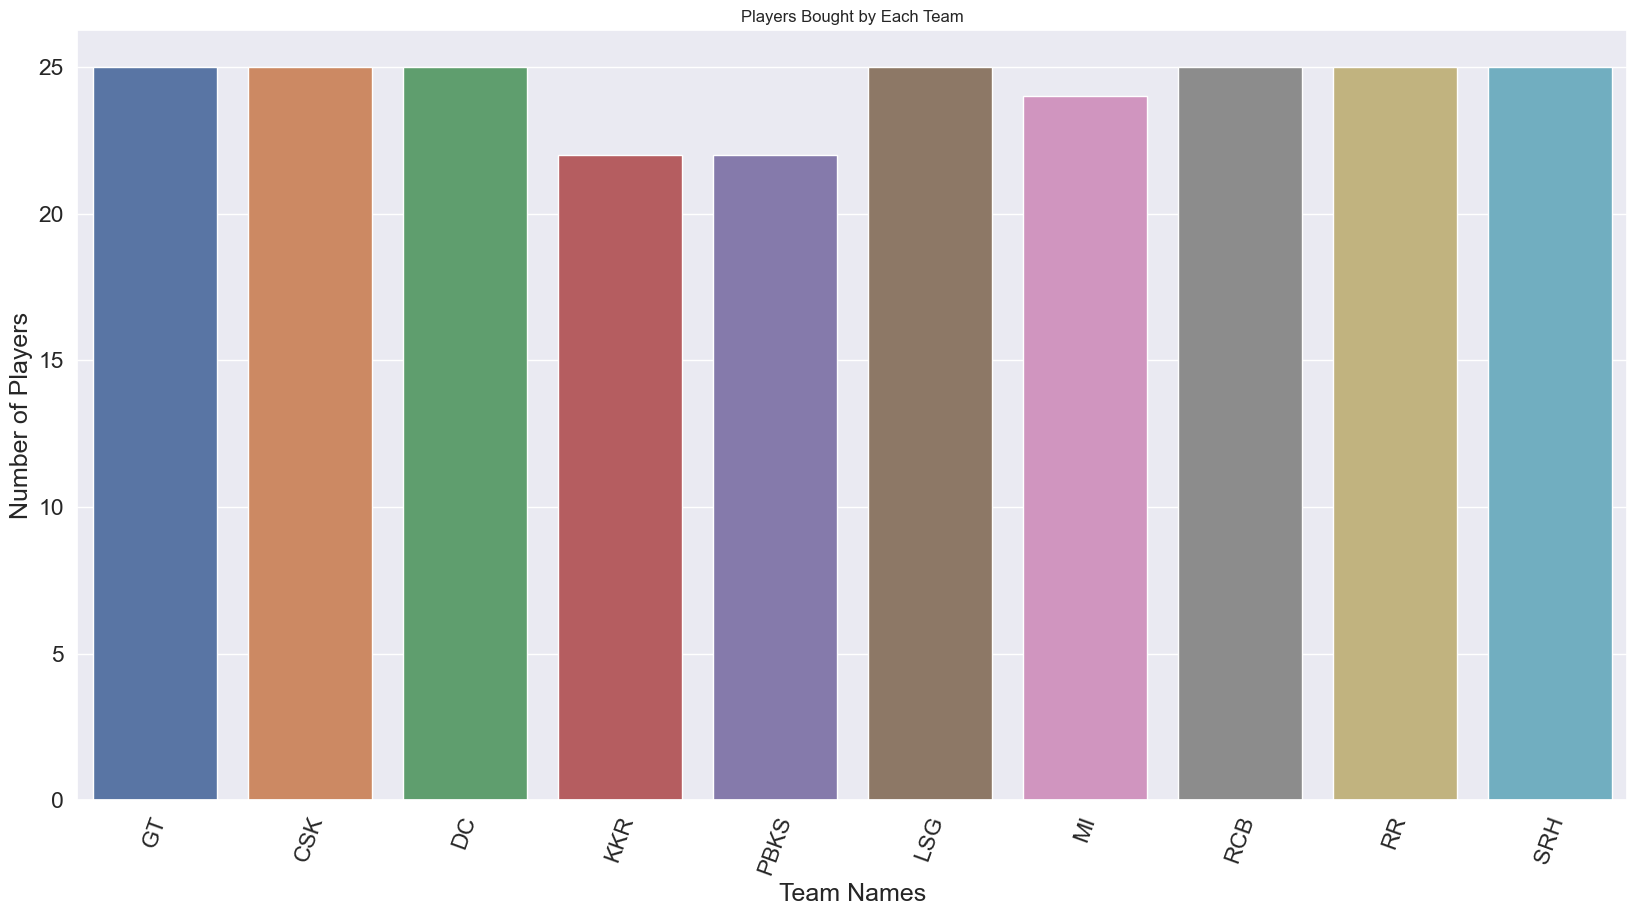

In [146]:
plt.figure(figsize=(20,10))
df = ipl
fig = sns.countplot(x = "2023 Squad", data = df, order = ["GT", "CSK", "DC", "KKR", "PBKS", "LSG", "MI", "RCB", "RR", "SRH"])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by Each Team', fontsize=12)
plt.xticks(rotation=70)

# for p in fig.paches:
#     fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
#     p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0,4),
#     textcoords = 'offset points')

In [147]:
ipl['retention'] = ipl['Base Price']

In [148]:
ipl['retention'].replace(['5000000', '20000000', '4000000', '2000000'], 'From Auction', inplace = True)

In [149]:
#treating Best Price

ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [150]:
ipl['base_price_unit'] =  ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [151]:
ipl['base_price'].replace('Retained',0,inplace = True)

In [152]:
ipl.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status,retention,base_price_unit,base_price
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT,Sold,From Auction,4000000,4000000
1,Joshua Little,5000000,BOWLER,4.4,528.0,Not Participated,GT,Sold,From Auction,5000000,5000000
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT,Sold,From Auction,20000000,20000000
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT,Sold,From Auction,2000000,2000000
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,Not Participated,GT,Sold,From Auction,5000000,5000000


In [153]:
# Total player retained and bought
ipl.groupby(['2023 Squad', 'retention'])['retention'].count()[:-1]

2023 Squad  retention   
CSK         10000000         1
            From Auction     6
            Retained        18
DC          10000000         1
            From Auction     4
            Retained        20
GT          From Auction     7
            Retained        18
KKR         10000000         1
            1500000          1
            From Auction     6
            Retained        14
LSG         7500000          1
            From Auction     9
            Retained        15
MI          1500000          1
            From Auction     7
            Retained        16
PBKS        From Auction     6
            Retained        16
RCB         1500000          1
            7500000          1
            From Auction     5
            Retained        18
RR          10000000         1
            1500000          1
            3000000          1
            From Auction     6
            Retained        16
SRH         10000000         3
            15000000         1
            Fr

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GT'),
  Text(1, 0, 'CSK'),
  Text(2, 0, 'DC'),
  Text(3, 0, 'KKR'),
  Text(4, 0, 'PBKS'),
  Text(5, 0, 'LSG'),
  Text(6, 0, 'MI'),
  Text(7, 0, 'RCB'),
  Text(8, 0, 'RR'),
  Text(9, 0, 'SRH')])

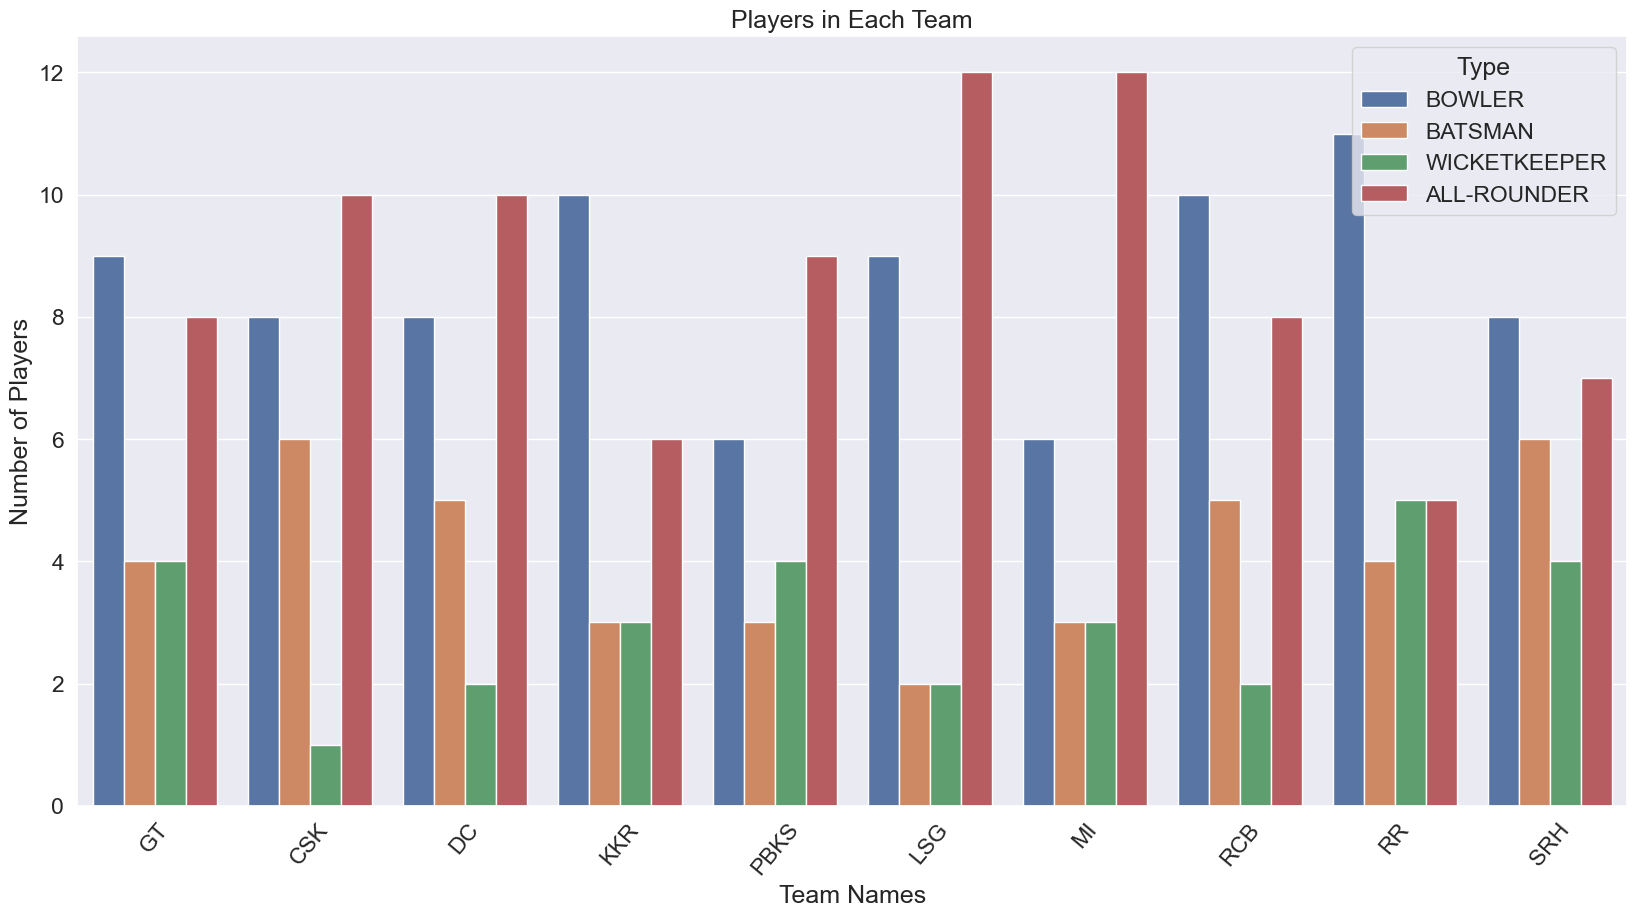

In [154]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x = "2023 Squad", data = df, hue=ipl['Type'], order = ["GT", "CSK", "DC", "KKR", "PBKS", "LSG", "MI", "RCB","RR", "SRH"])
# fig = sns.countplot(ipl[ipl['2023 Squad']!='Unsold']['2023 Squad'],)
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.xticks(rotation = 50)

In [155]:
#height amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['2023 Squad'])['Cost in Rs. (CR)'].max()[:-1].sort_values(ascending = False)


2023 Squad
PBKS    18.50
MI      17.50
CSK     16.25
LSG     16.00
GT       6.00
RR       5.75
DC       5.50
SRH      2.60
KKR      0.90
RCB      0.70
Name: Cost in Rs. (CR), dtype: float64

In [156]:
# Player retained at maximum price.

ipl[ipl['retention'] == 'Retained'].sort_values(by = 'Cost in Rs. (CR)', ascending = False).head(1)

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status,retention,base_price_unit,base_price
7,Rahul Tewatia,Retained,ALL-ROUNDER,0.0,0.0,GT,GT,Sold,Retained,Retained,0


In [157]:
# Top 5 bowlers

ipl[(ipl['retention'] == 'From Auction') & (ipl['Type'] == 'BOWLER')].sort_values(by = 'Cost in Rs. (CR)', ascending = False)

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status,retention,base_price_unit,base_price
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT,Sold,From Auction,4000000,4000000
50,Mukesh Kumar,2000000,BOWLER,5.5,660.0,Not Participated,DC,Sold,From Auction,2000000,2000000
1,Joshua Little,5000000,BOWLER,4.4,528.0,Not Participated,GT,Sold,From Auction,5000000,5000000
222,Adil Rashid,20000000,BOWLER,2.0,240.0,Not Participated,SRH,Sold,From Auction,20000000,20000000
170,Rajan Kumar,2000000,BOWLER,0.7,84.0,Not Participated,RCB,Sold,From Auction,2000000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
346,Ben Dwarshuis,5000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,5000000,5000000
326,Shivam Sharma,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000
325,Karthik Meiyappan,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000
324,Peter Hatzoglou,2000000,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000


In [158]:
ipl[(ipl['retention'] == 'From Auction') & (ipl['Type'] == 'BATSMAN')].sort_values(by = 'Cost in Rs. (CR)', ascending = False)

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad,status,retention,base_price_unit,base_price
51,Rilee Rossouw,20000000,BATSMAN,4.6,552.0,Not Participated,DC,Sold,From Auction,20000000,20000000
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT,Sold,From Auction,20000000,20000000
80,Mandeep Singh,5000000,BATSMAN,0.5,60.0,DC,KKR,Sold,From Auction,5000000,5000000
28,Ajinkya Rahane,5000000,BATSMAN,0.5,60.0,KKR,CSK,Sold,From Auction,5000000,5000000
99,Harpreet Bhatia,2000000,BATSMAN,0.4,48.0,Not Participated,PBKS,Sold,From Auction,2000000,2000000
31,Shaik Rasheed,2000000,BATSMAN,0.2,24.0,Not Participated,CSK,Sold,From Auction,2000000,2000000
229,Anmolpreet Singh,2000000,BATSMAN,0.2,24.0,MI,SRH,Sold,From Auction,2000000,2000000
354,Matthew Breetzke,2000000,BATSMAN,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000
422,Anirudh Balachander,2000000,BATSMAN,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000
355,Shivam Chauhan,2000000,BATSMAN,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,2000000,2000000


In [159]:
ipl = ipl.rename(columns={'2023 Squad':'Team'})

In [160]:
ipl = ipl.rename(columns={'2022 Squad':'Prev_team'})

In [161]:
unsold_players = ipl[(ipl.Prev_team != 'Not Participated') 
                     & (ipl.Team == 'Unsold')][['Player Name', 'Prev_team']]

In [162]:
print(unsold_players)

               Player Name Prev_team
245           Chris Jordan       CSK
246             Adam Milne       CSK
253           Corbin Bosch        RR
254            Priyam Garg       SRH
256         Shashank Singh       SRH
264          Shreyas Gopal       SRH
269    Sherfane Rutherford       RCB
271  Rassie Van Der Dussen        RR
272         Daryl Mitchell        RR
273          Mohammad Nabi       KKR
274          Jimmy Neesham        RR
278     Dushmanta Chameera       LSG
279         Riley Meredith        MI
281         Sandeep Sharma      PBKS
288         Shahbaz Nadeem       LSG
291          Ashwin Hebbar        DC
303     Jagadeesha Suchith       SRH
305         Baba Indrajith       KKR
306        Sheldon Jackson       KKR
307            Aryan Juyal        MI
309        Luvnith Sisodia       RCB
313         Sushant Mishra       SRH
315            Ishan Porel      PBKS
317           Basil Thampi        MI
322           Tejas Baroka        RR
331             Karun Nair        RR
3